### **MVP Machine Learning & Analytics**
### *Aluno: Kevin Sathler Rêgo Chagas*

## **01. Descrição do problema**

### **A base de dados:**

A base de dados escolhida foi retirada de um database da internet que estava disponibilizado para uso e para análises. Após verificar alguns databases foi compreendido que o utilizado neste trabalho seria uma boa opção para trbalhar com os modelos de previsão, tanto pela boa congruência e correlação dos dados, quanto por ser um tema bem interessante.
Portanto foi feito o download deste database em formato .CSV e o mesmo foi nomeado como "Sleep_health_lifestyle_dataset.csv". Este arquivo foi carregado no mesmo diretório do GitHub que este Collab está localizado, de forma que haja maior facilidade na realização do carregamento do arquivo no decorrer deste MVP.
Este dataset contém as informações de alguns indivíduos: informações profissionais, de habitos de vida, da saúde do indivíduo e principalmente informações sobre o sono.

**Informações sobre os atributos:**

**Person ID:** Código único identificador, um número sequencial que pode ser utilizado para diferenciar um registro de outro;

**Quality of Sleep:** Dado principal deste database, este dado informa a qualdiade do sono do indivíduo, é esperado que todas as outras variáveis (com exeção de "Person ID" influenciem ou tenahm alguma correlação com este dado. Portanto esta será a informação que nossos modelos irão prever como treino e como teste.

**Gender:** O gênero do indivíduo (Male ou Female);

**Age:** Representa a idade do indivíduo;

**Occupation:** A profissão que o indivíduo pode ter;

**Sleep Duration :** O tempo de duração médio do sono desta pessoa;

**Physical Activity Level:** Representa o grau de atividade física que o indivíduo costuma realizar;

**Stress Level:** Retrata o nível de stress desta pessoa;

**BMI Category:** A informação de massa corpórea da pessoa (Ex.: Normal, Gordo ou Obeso)

**Blood Pressure:** O nível de pressão sanguínea do indivíduo;

**Sleep Duration :** O tempo de duração médio do sono desta pessoa;

**Heart Rate:** O ritímo do coraçaõ do indíviduo;

**Sleep Disorder:** Retrata se a pessoa possuí algum disturbio do sono ou não;

### **Descrição do problema a ser analisado:**

O dataset que será analisado é relacionado a algumas informações que se correlacionam e juntas podem ou não influenciar na qualidade de sono do indivíduo. Baseado nesta premissa, temos certos objetivos;
- Verificar o database e compreender se os dados precisam passar por alguma padronização, correção, limpeza ou revisão;
- Definir qual o modelo mais se enquadra para previsão da qualidade do sono do indivíduo;
- Verificar de forma visual qual modelo tem melhor "fit" baseado em critérios como "acurácia" e "precisão";
- Aplicar hiperparâmetros para otimizar o modelo, caso necessário;
- Aplicar uma validação cruzada para obter resultados diferentes da validação de split normal;
Identificar quais são os top atributos que impactam na previsão e a correlação entre toedos atributos;

### **Conhecimento prévio do problema/dataset:**

A princípio não tenho muitas informações sobre o dataset, portanto iremos avaliar os dados primeiramente e a partir disso montar o raciocínio lógico e, conforme as análises forem ocorrendo (e os erros também), ir tomando decisões até chegar no melhor modelo.

### **Tratamento prévio de dados e/ou restrições:**

O dataset não foi avaliado anteriormente, foi apenas o download de uma base de dados já existente. Algumas informações precisam ser avaliadas para garantir a confiabilidade dos dados:
- Será avaliado se as colunas do database não possuem informações nulas ou divergentes (como um gênero como "maça", por exemplo);
- Não pode haver quantidades negativas e nem zeradas de algumas colunas (como por exemplo: "Heart Rate" e "Blood pressure";

## **02. Carga de dados**

In [41]:
#Instalação do Pandas Profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (17.8 MB)
  Preparing metadata (setup.py) ... done


In [42]:
# imports necessários
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import missingno as ms
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# URL direto para o arquivo CSV no GitHub
url = 'https://raw.githubusercontent.com/KevinSathler/Machine-Learning-Analytics/main/Sleep_health_and_lifestyle_dataset.csv'

# Carregar o conjunto de dados usando o pandas
dados = pd.read_csv(url, header=0)

# Exibir as primeiras linhas do conjunto de dados para verificar se foi carregado corretamente
print(dados.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

## **03. Análise de dados e definição de modelos**

### **03.01. Trativas e avaliação de database**

In [43]:
# Dimensão do dataset
print(dados.shape)

(374, 13)


Observa-se, através da análise acima, que o dataset têm 347 linhas e 13 colunas. Agora iremos descobrir quais são as colunas e o tipo de informação contido nelas:

In [44]:
# Informações do dataset
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [45]:
# Mostra as 10 primeiras linhas do dataset
dados.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [46]:
# Mostra as 10 últimas linhas do dataset
dados.tail(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
364,365,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
365,366,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
366,367,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
367,368,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Considerando as diversas colunas vistas anteriormente, vamos fazer a análise da descrição (describe()) das colunas com dados numéricos: "Age", "Sleep Duration", "Quality of Sleep", "Stress level", "Heart rate" e "Daily steps".
De forma que possamos entender se há alguma divergência de dados ou, ao menos, verificar a distribuição.

In [47]:
#Descrição Age
round(dados['Age'].describe(),0)

count    374.0
mean      42.0
std        9.0
min       27.0
25%       35.0
50%       43.0
75%       50.0
max       59.0
Name: Age, dtype: float64

Para a coluna "Age", percebemos que não há dados de idade zero e que a faixa de idade estudada é entre 27 anos e 59 anos.

In [48]:
#Descrição Sleep Duration
round(dados['Sleep Duration'].describe(),0)

count    374.0
mean       7.0
std        1.0
min        6.0
25%        6.0
50%        7.0
75%        8.0
max        8.0
Name: Sleep Duration, dtype: float64

Para a coluna "Sleep Duaration", percebemos que não há dados exagerados com um tempo de duração em horas acima das 8 horas (como um valor de 10 ou 12 horas, por exemplo). Mas também precebemos que não há dados com um tempo de sono muito ruim (como 3 ou 4 horas). A faixa de tempo de sono é entre 6 e 8.
Portanto concluí-se que, para esta base de dados, dificuldades em tempos duração do sono não foram considerados.


In [49]:
#Descrição Quality of Sleep
round(dados['Quality of Sleep'].describe(),0)

count    374.0
mean       7.0
std        1.0
min        4.0
25%        6.0
50%        7.0
75%        8.0
max        9.0
Name: Quality of Sleep, dtype: float64

A coluna "Quality of Sleep" nos mostra que há uma grande variação na qualidade do sono dos participates da pesquisa. Além disso, entendemos que dentro dos dados que serão utilizados, não há dados negativos.


In [50]:
#Descrição Stress Level
round(dados['Stress Level'].describe(),0)

count    374.0
mean       5.0
std        2.0
min        3.0
25%        4.0
50%        5.0
75%        7.0
max        8.0
Name: Stress Level, dtype: float64

Podemos perceber que não há dados negativos, exorbitantes e nem zerados em relação ao nível de stress.

In [51]:
#Descrição Heart Rate
round(dados['Heart Rate'].describe(),0)

count    374.0
mean      70.0
std        4.0
min       65.0
25%       68.0
50%       70.0
75%       72.0
max       86.0
Name: Heart Rate, dtype: float64

Podemos perceber, através da descrição da coluna "Heart Rate", que não há dados negativos, exorbitantes e nem zerados. Além disso, o menor dos dados faz sentido para um ser humano vivo (65 batimentos por minuto), assim como o dado máximo (86 batimentos por minuto).

In [52]:
#Descriçaõ Daily Steps
round(dados['Daily Steps'].describe(),0)

count      374.0
mean      6817.0
std       1618.0
min       3000.0
25%       5600.0
50%       7000.0
75%       8000.0
max      10000.0
Name: Daily Steps, dtype: float64

Podemos perceber, através da descrição da coluna "Daily Steps", que não há dados negativos, exorbitantes e nem zerados.

Antes de verificar a distribuição dos dados, iremos verificar se há valores nulos em nossa base de dados e, além disso, fazer mais um check para confirmar se há dados zerados dentre os numéricos que estamos avaliando.

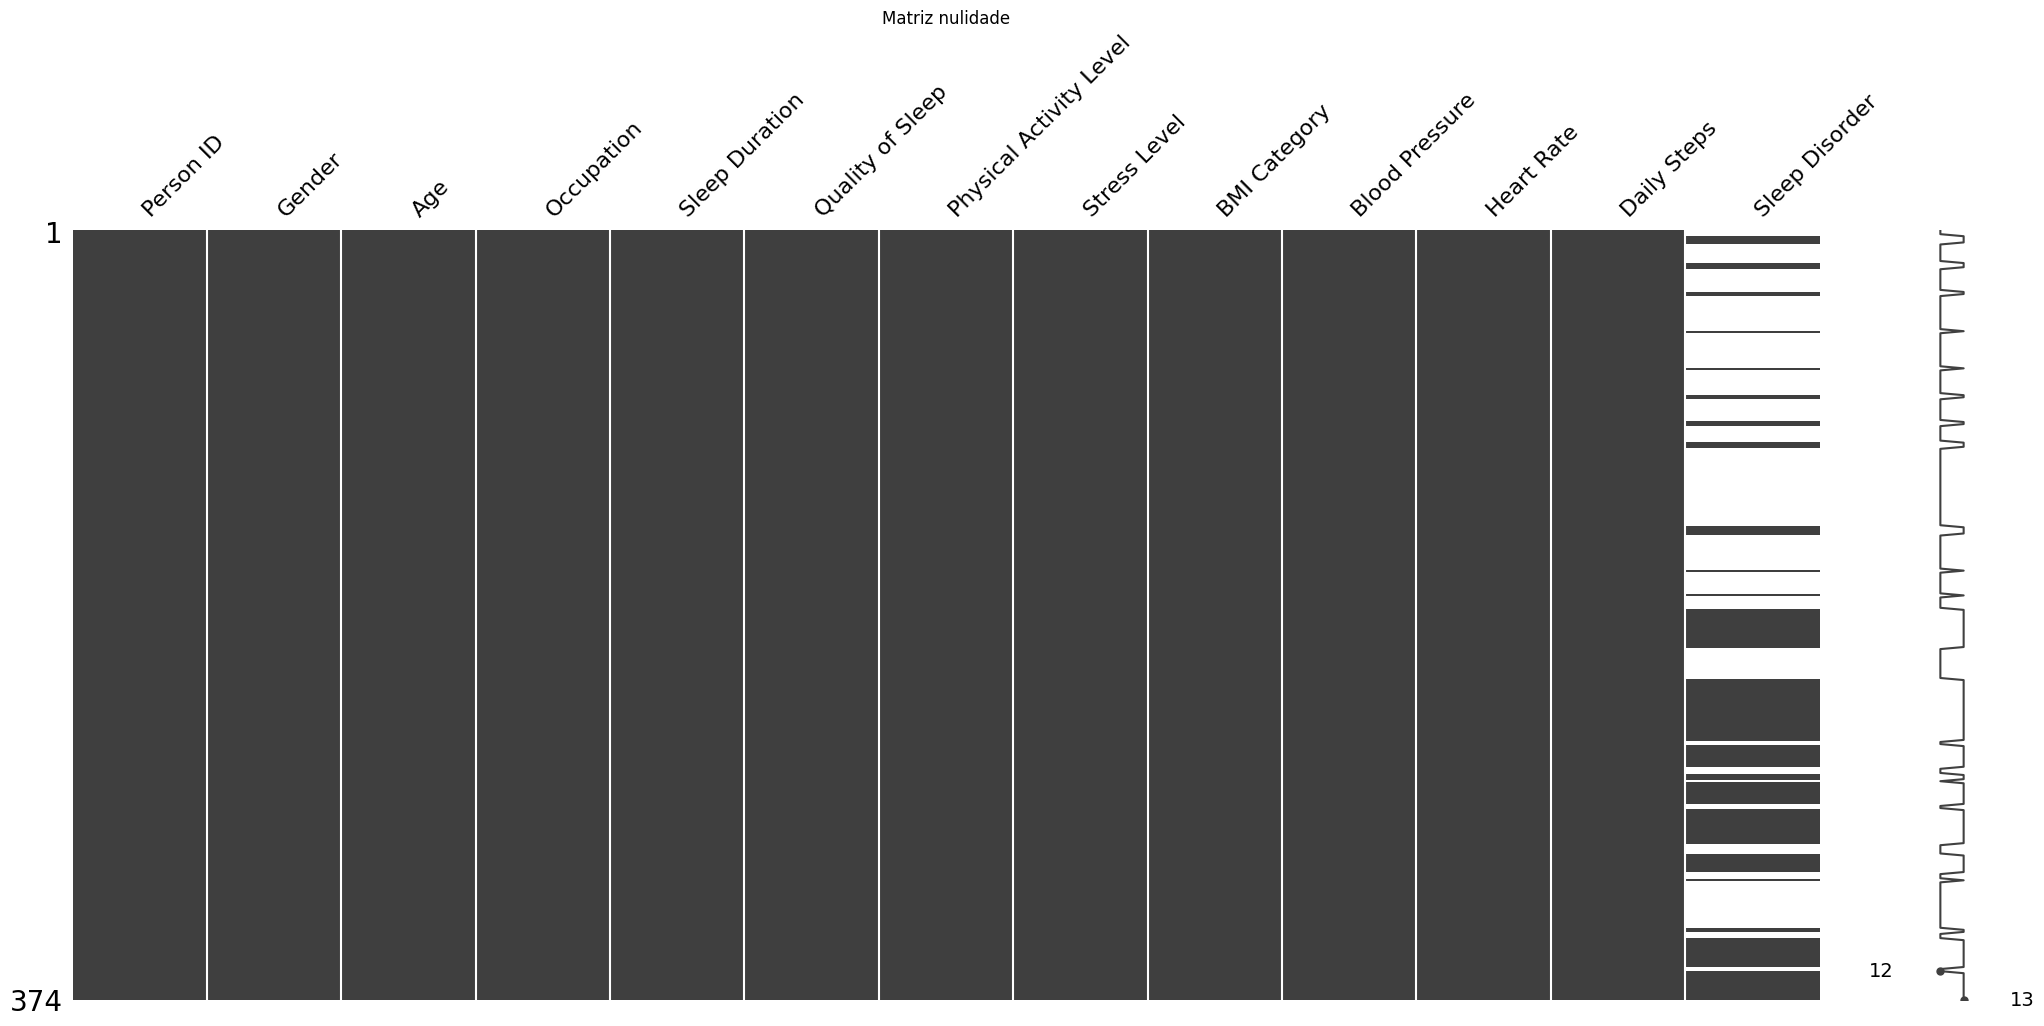

In [53]:
# Matriz de nulidade
ms.matrix(dados)
plt.title('Matriz nulidade')
plt.show()

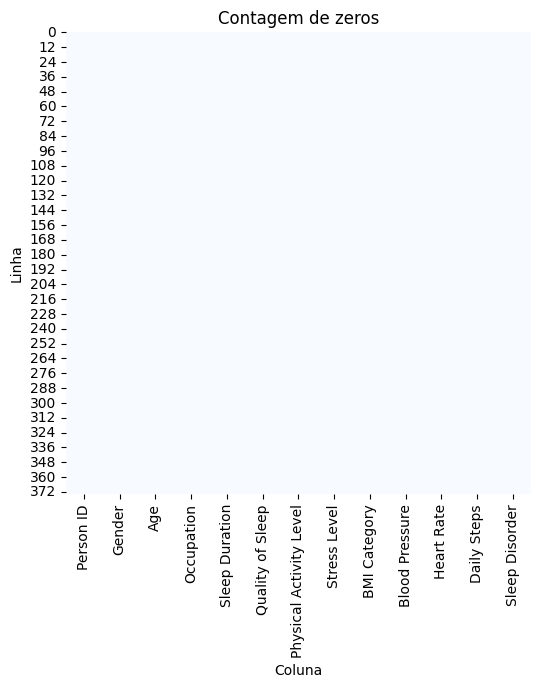

In [54]:
# Contagem de zeros
zeros_cont = (dados == 0).astype(int)

# Desenhar um mapa de calor
plt.figure(figsize=(6, 6))
sns.heatmap(zeros_cont, cmap="Blues", cbar=False)
plt.title('Contagem de zeros')
plt.xlabel('Coluna')
plt.ylabel('Linha')
plt.show()

Considerando que a matriz de nulidade informa visualmente que não há espaços nulos, e o heatmap confirma que não há informações zeradas. Iremos repetir a análise acima (porém desta vez sem o heatmap).

In [55]:
qtd_zeros_HR= (dados['Heart Rate'] == 0).sum()
print(f'Número de zeros na coluna "Heart Rate": {qtd_zeros_HR}')

qtd_zeros_age= (dados['Age'] == 0).sum()
print(f'Número de zeros na coluna "Age": {qtd_zeros_age}')

qtd_zeros_steps= (dados['Daily Steps'] == 0).sum()
print(f'Número de zeros na coluna "Daily Steps": {qtd_zeros_steps}')

Número de zeros na coluna "Heart Rate": 0
Número de zeros na coluna "Age": 0
Número de zeros na coluna "Daily Steps": 0


Consideramos que em nenhuma destas colunas numéricas há dados zerados ou extremamente fora do padrão. Agora, de forma que possamos analisar os outliers, iremos apresentar alguns boxsplots.

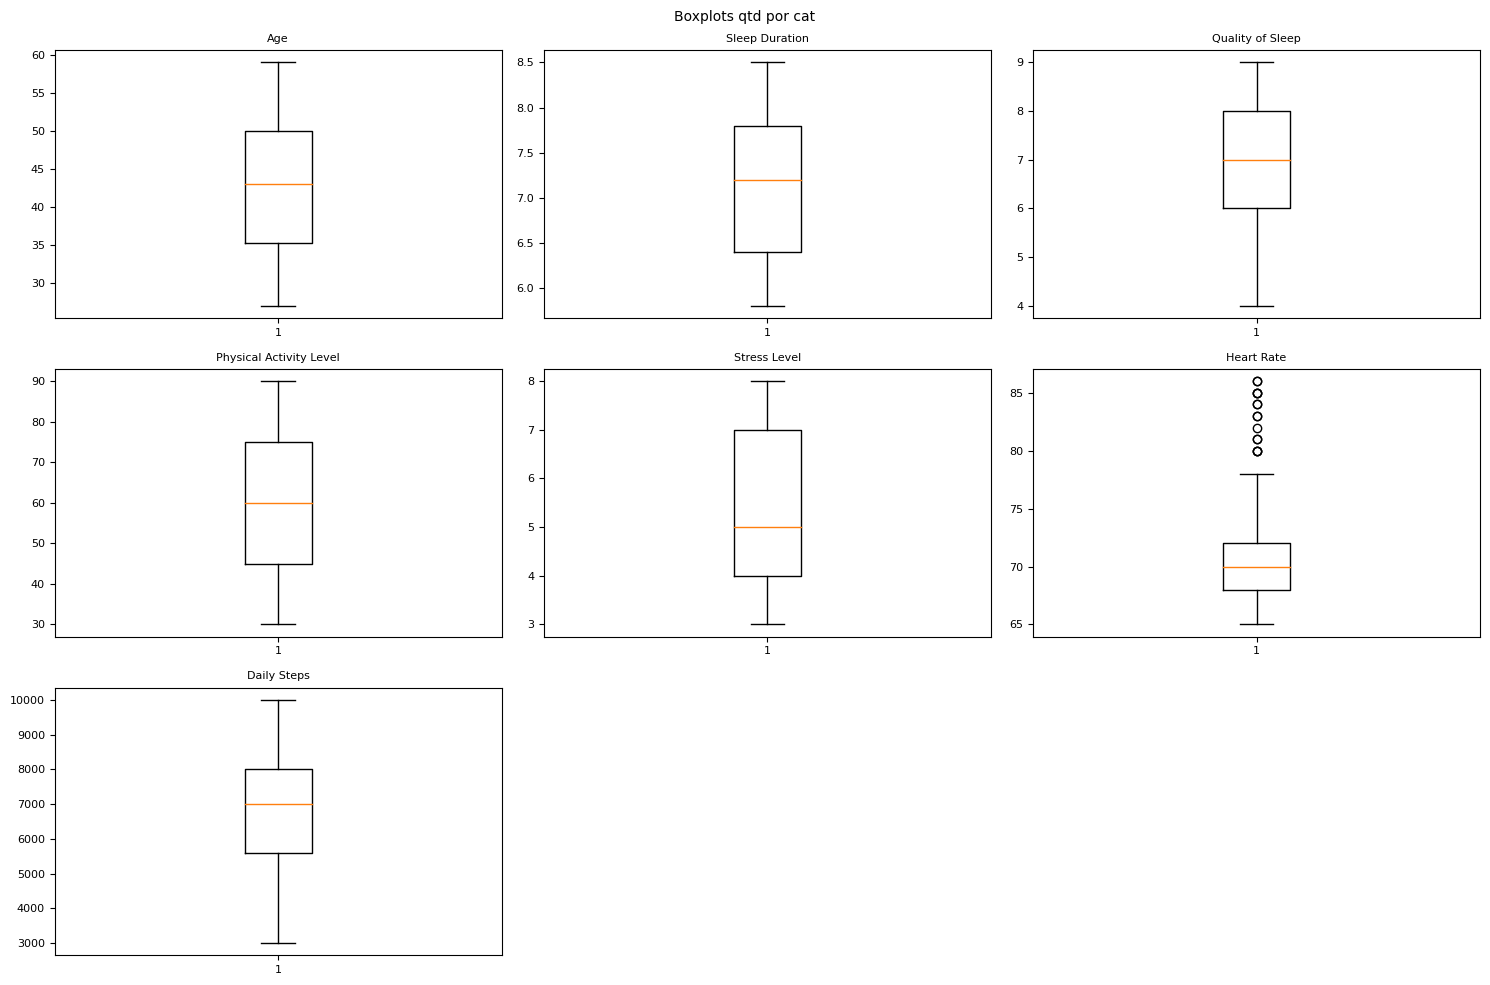

In [56]:
# Seleção das colunas desejadas
colunas = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]
colunas_selecionadas = dados[colunas]

# Subplots e criação da figura
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))

# Criar o boxsplot
for i, coluna in enumerate(colunas_selecionadas.columns, start=1):
    plt.subplot(3, 3, i)
    plt.boxplot(colunas_selecionadas[coluna])
    plt.title(coluna, fontsize=8)

# Ajustar tamanho dos rótulos
    plt.tick_params(axis='both', labelsize=8)

# Ajustar titulo
    plt.suptitle('Boxplots qtd por cat', fontsize=10)

plt.tight_layout()
plt.show()



Nota-se portanto, baseado em nossas análises, que para as colunas numéricas não há dados com valor negativos, zerados ou nulos. O que as isenta de tratativas referentes a estes possíveis problemas. Observando também os boxsplot apresentados anteriormente é possível observar que não há grandes outliers.

Com excessão do gráfico que apresenta a informação de "Heart_rate", que há outliers. Porém, entendemos que queremos manter estas disparidades, dado que são fatores que podem ocorrer e irão influenciar o resultado. Portanto deixaremos os dados como estão para estarem o mais próximo possível da realidade. Até porquê o outlier com valor mais alto ainda é totalmente possível para um ser humano.

Agora iremos observar os dados que não possuem a característica numérica. Para estes dados iremos entender a distribuição das categorias existentes dentro de cada coluna, para ver se estão muito dispersas ou desequilibradas entre si. E além disso, compreender se há algum valor sem sentido (como o citado anteriormente do "gênero maçã").

Portanto faremos a análise começando pela coluna "Gender". Iremos encontrar quais são os valores distintos que podem existir nessa coluna através de um gráfico de barras que irá apresentar quantas ocorrências existem paracada um destes valores distintos da coluna "Gender".

Valores distintos na coluna 'Gender': ['Male' 'Female']


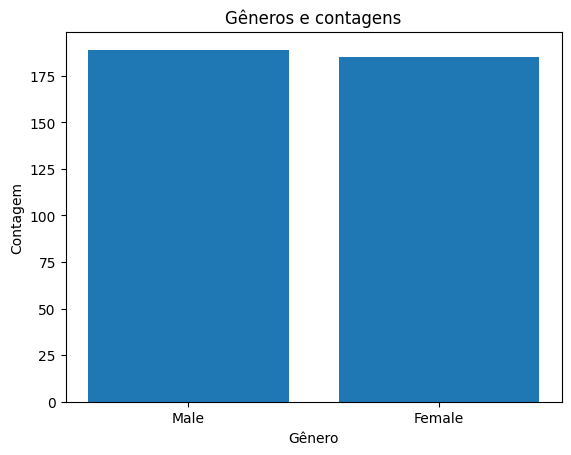

In [57]:
# Selecionar valores distintos
valores = dados['Gender'].unique()
print("Valores distintos na coluna 'Gender':", valores)

# Número de ocorrênicias de cada valor
contagem = dados['Gender'].value_counts()

# Criar o gráfico de barras
plt.bar(contagem.index, contagem.values)
plt.title("Gêneros e contagens")
plt.xlabel("Gênero")
plt.ylabel("Contagem")
plt.show()

Observamos que não há nenhuma informação além de "Male" e "Female", portanto todas as informações desta coluna são válidas. Além disso, há uma distribuição bem uniforme de ambos os sexos neste database.

Agora iremos fazer a mesma análise para as demais colunas:

Valores da coluna 'Occupation': ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


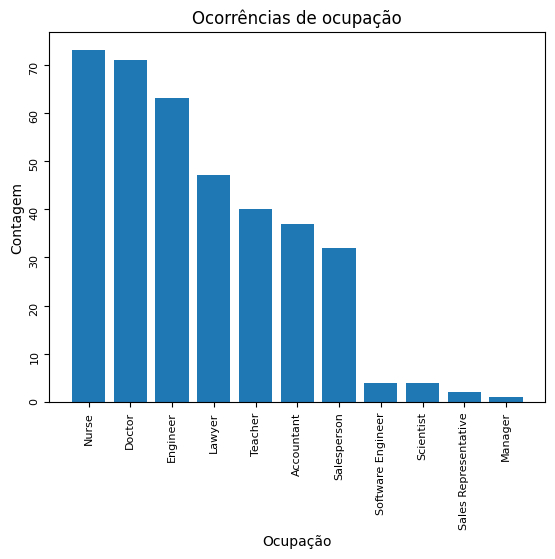

In [58]:
# Selecionar valores distintos da coluna "Occupation"
valores = dados['Occupation'].unique()
print("Valores da coluna 'Occupation':", valores) #para facilitar a visualização, caso necessário

# Número de ocorrênicias de cada valor
contagem = dados['Occupation'].value_counts()

# Criar o gráfico de barras
plt.bar(contagem.index, contagem.values)
plt.title("Ocorrências de ocupação")
plt.xlabel("Ocupação")
plt.ylabel("Contagem")

# Ajsustar rótulos e rotação de eixo
plt.tick_params(axis='both', labelsize=8, rotation=90)

plt.show()

Valores da coluna 'BMI Category': ['Overweight' 'Normal' 'Obese' 'Normal Weight']


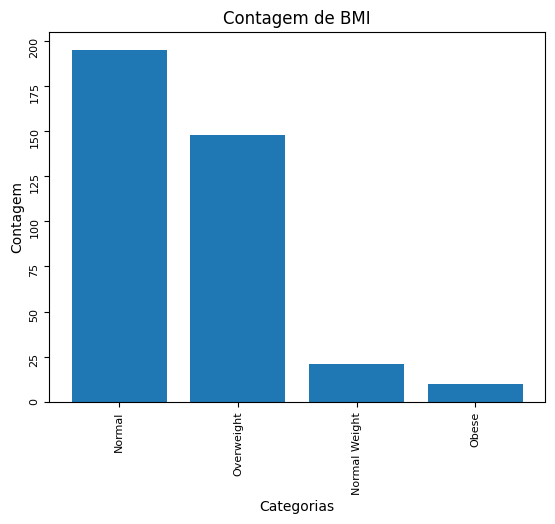

In [59]:
# Valores de "BMI Category"
valores = dados['BMI Category'].unique()
print("Valores da coluna 'BMI Category':", valores)

# Contar o número de ocorrências de cada valor
contagem = dados['BMI Category'].value_counts()

# Criar o gráfico de barras
plt.bar(contagem.index, contagem.values)
plt.title("Contagem de BMI")
plt.xlabel("Categorias")
plt.ylabel("Contagem")

# Ajsustar rótulos e rotação de eixo
plt.tick_params(axis='both', labelsize=8, rotation=90)
plt.show()

Valores existentes em 'Sleep Disorder': [nan 'Sleep Apnea' 'Insomnia']


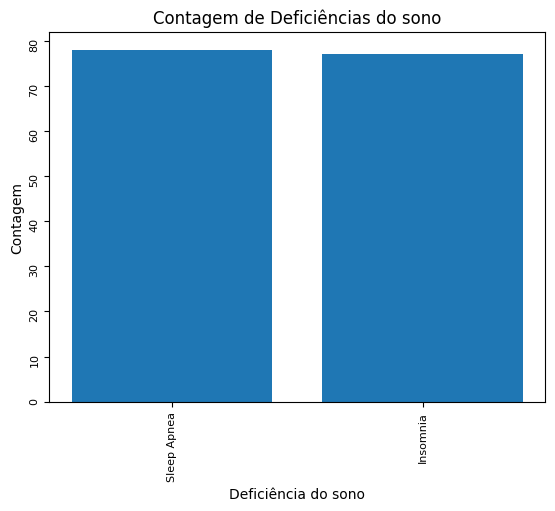

In [60]:
# Valores de "BMI Category" "Sleep Disorder"
valores = dados['Sleep Disorder'].unique()
print("Valores existentes em 'Sleep Disorder':", valores)

# Contar o número de ocorrências de cada valor
contagem = dados['Sleep Disorder'].value_counts()
plt.bar(contagem.index, contagem.values)
plt.title("Contagem de Deficiências do sono")
plt.xlabel("Deficiência do sono")
plt.ylabel("Contagem")

# Ajsustar rótulos e rotação de eixo
plt.tick_params(axis='both', labelsize=8, rotation=90)
plt.show()

Podemos notar que na coluna "BMI Category" há duas categorias que são equivalentes e poderiam ser agrupadas em uma só: A categoria "Normal" e a categoria "Normal weight". Portanto faremos uma substituição do "Normal weight" para "Normal", de forma que se tornem similares.

Valores da coluna'BMI Category': ['Overweight' 'Normal' 'Obese']


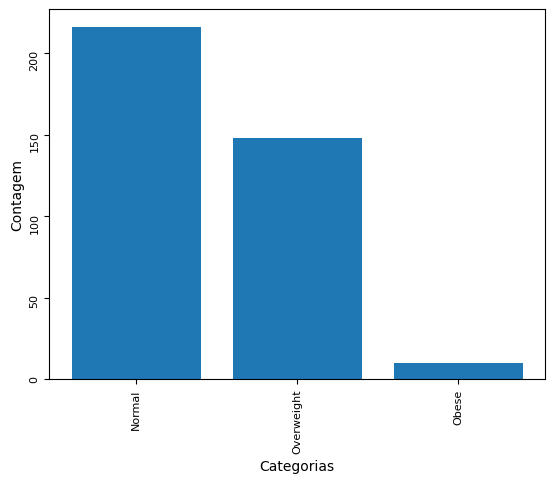

In [61]:
# Substituir "Normal weight" por "Normal" na coluna "BMI Category"
dados['BMI Category'] = dados['BMI Category'].replace('Normal Weight', 'Normal')

# Refazer a análise dos valores únicos da coluna, após correção
valores = dados['BMI Category'].unique()
print("Valores da coluna'BMI Category':", valores)
contagem = dados['BMI Category'].value_counts()
plt.bar(contagem.index, contagem.values)
plt.xlabel("Categorias")
plt.ylabel("Contagem")
plt.tick_params(axis='both', labelsize=8, rotation=90)
plt.show()

Após toda esta avaliação das categorias, não não vimos nenhuma informação muito fora do padrão ou algum desbalanceamento que não faça sentido. Os gráficos desbalanceados (como o da coluna BMI Category) retratam a realidade, portanto a escolha feita foi não manipular estes dados para não perder o aspecto "real"

Agora que temos a certeza de que os dados estão válidos para serem trabalhados. Para compreender a correlação entre os dados numéricos vamos, primeiramente, igualar todos os dados transformando os dados que estão em categoria para dados em formato numérico. Seguindo o padrão abaixo:

Para a coluna "BMI Category", haverá a divisão:
*   1: Normal
*   2: Overweight
*   3: Obese

Para a coluna "Sleep Disorder", a divisão feita será:
* 0: Dados vazios;
* 1: Sleep Apnea e Insomnia;

Para a coluna "Gender" será:
* 1: Male
* 2: Female


In [62]:
# Criar uma cópia dos dados para se tornar a informação tratada
dados_corrigidos = dados.copy()

# mapear os valores da coluna "BMI Category" para os novos valores
mapeamento = {"Normal": 1, "Overweight": 2, "Obese": 3}

# Substituir os valores e alterar o tipo da coluna
dados_corrigidos['BMI Category'] = dados_corrigidos['BMI Category'].map(mapeamento)
dados_corrigidos['BMI Category'] = dados_corrigidos['BMI Category'].astype('Int64')

# Substituir valores vazios por 0 e os demais valores por 1 na coluna "Sleep Disorder". Após isso, alterar o tipo da coluna
dados_corrigidos['Sleep Disorder'] = dados_corrigidos['Sleep Disorder'].fillna(0)
dados_corrigidos['Sleep Disorder'] = dados_corrigidos['Sleep Disorder'].apply(lambda x: 0 if x == 0 else 1)
dados_corrigidos['Sleep Disorder'] = dados_corrigidos['Sleep Disorder'].astype('Int64')

# Mapear os valores da coluna "Gender" para os novos valores e alterar o tipo da coluna
mapeamento = {"Male": 1, "Female": 2}
dados_corrigidos['Gender'] = dados_corrigidos['Gender'].map(mapeamento)
dados_corrigidos['Gender'] = dados_corrigidos['Gender'].astype('Int64')


dados_corrigidos.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,0
1,2,1,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0
2,3,1,28,Doctor,6.2,6,60,8,1,125/80,75,10000,0
3,4,1,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1
4,5,1,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,1
5,6,1,28,Software Engineer,5.9,4,30,8,3,140/90,85,3000,1
6,7,1,29,Teacher,6.3,6,40,7,3,140/90,82,3500,1
7,8,1,29,Doctor,7.8,7,75,6,1,120/80,70,8000,0
8,9,1,29,Doctor,7.8,7,75,6,1,120/80,70,8000,0
9,10,1,29,Doctor,7.8,7,75,6,1,120/80,70,8000,0


Então iremos verificar se os dados estão no tipo/formato correto:

In [63]:
print(dados_corrigidos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    Int64  
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    Int64  
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    Int64  
dtypes: Int64(3), float64(1), int64(7), object(2)
memory usage: 39.2+ KB
None


Agora com todos os dados tornando-se numéricos (com excessão da coluna "Occupation" devido a exstensão de valores distintos existentes, iremos fazer uma matriz de correlação para entender a influência que um exerce sobre o outro (diretamente ou inversamente proporcional)

Matriz de Correlação:
                         Person ID    Gender       Age  Sleep Duration  \
Person ID                 1.000000  0.584229  0.990516        0.296305   
Gender                    0.584229  1.000000  0.596358        0.121579   
Age                       0.990516  0.596358  1.000000        0.344709   
Sleep Duration            0.296305  0.121579  0.344709        1.000000   
Quality of Sleep          0.431612  0.291366  0.473734        0.883213   
Physical Activity Level   0.149882 -0.001454  0.178993        0.212360   
Stress Level             -0.394287 -0.396018 -0.422344       -0.811023   
BMI Category              0.442905  0.242743  0.427704       -0.349605   
Heart Rate               -0.225467 -0.217105 -0.225606       -0.516455   
Daily Steps               0.043844  0.014509  0.057973       -0.039533   
Sleep Disorder            0.446196  0.285824  0.432007       -0.338622   

                         Quality of Sleep  Physical Activity Level  \
Person ID          

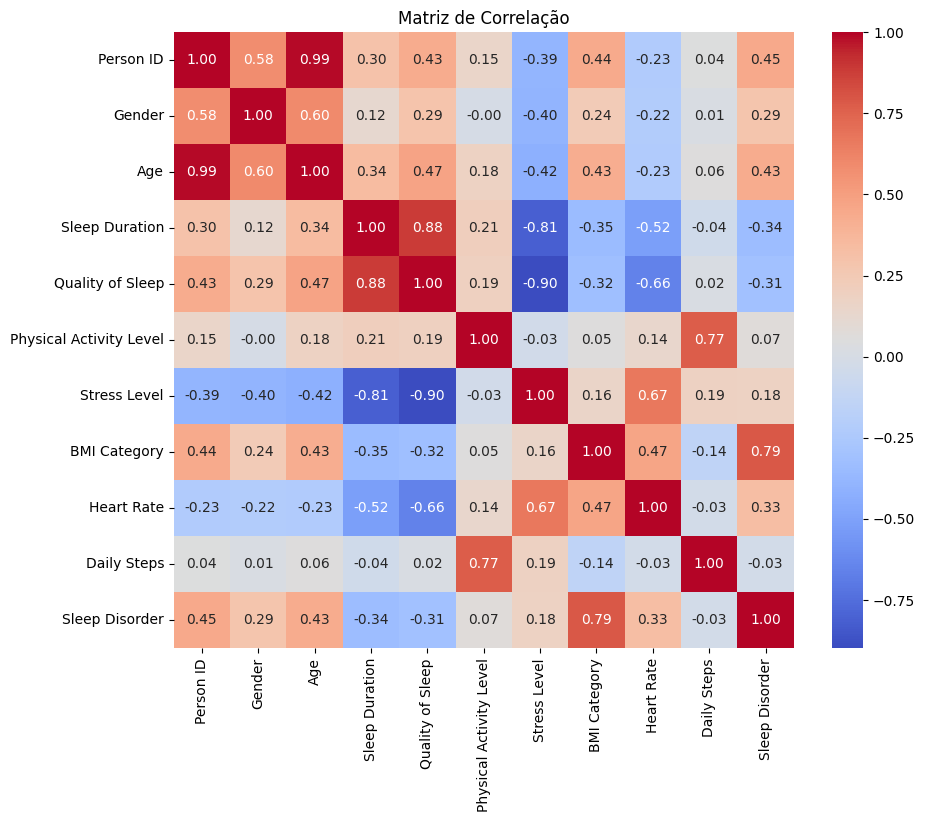

In [64]:
# Escolher as colunas numéricas (int64 e float64)
dados_numericos = dados_corrigidos.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Mostrar a matriz de correlação
print("Matriz de Correlação:")
print(matriz_correlacao)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

Observado a matriz de correlação, observamos alguns comportamentos:
- A idade tem uma forte correlação com o ID da pessoa, logo acredita-se que as idades estão em ordem crescente
- A idade tem uma correlação inversamente proporcional com o nível de stress, ou seja, quanto mais jovem a pessoa, menor seu núvel de stress. Asssim como a idade tem uma correlação proporcional com a qualidade do sono: Quanto mais jovem, maior a qualidade do sono;
- Duração do sono é proporcional a qualidade do sono e inversamente proporcional ao nível de stress;
- Qualidade do sono é inversamente proporcional ao nível de stress e aos batimentos caríacos (Quanto menor os batimentos, maior a qualidade do sono)
- Atividade física é proporcional ao número de passos no dia;
- Nível de stress é inversamente proporcional a qualidade e duração do sono, porém proporcional aos batimentos cardíacos;
- Há uma correlação forte entre a massa corpórea e desdordens do sono, ou seja, quanto maior a massa gorda, mais chances de haver uma disfunção de sono e, além disso, maiores são os batimentos cardíacos;

### **03.02. Definição, treino, teste e ajuste de modelos**

Para estudo do modelo de previsão, iremos considerar os "dados_corrigidos", pois as classes categóricas foram convertidas em maior parte para dados numéricos. Com exceção dos dados de "Ocupation" e os dados de "Blood pressure". Dada a maior complexidade para converter os dados "Blood pressure" em valores numéricos, vamos optar por remove-los das análises.
Caso quisessemos manter estes dados em nossa análise, precisáriamos criar uma categorização, por exemplo: "Pressões entre X e Y entrariam em tal classificação", etc...

In [65]:
# Descartar a coluna 'Blood Pressure'
dados_corrigidos = dados_corrigidos.drop(columns=['Blood Pressure'])

In [66]:
# Converter 'Gender', 'BMI Category' e 'Sleep Disorder' para Int64
dados_corrigidos['Gender'] = dados_corrigidos['Gender'].astype('Int64')
dados_corrigidos['BMI Category'] = dados_corrigidos['BMI Category'].astype('Int64')
dados_corrigidos['Sleep Disorder'] = dados_corrigidos['Sleep Disorder'].astype('Int64')

# Converter a coluna 'Occupation' em dummy
dados_corrigidos = pd.get_dummies(dados_corrigidos, columns=['Occupation'])

Agora que os dados estão quase prontos para o treino e teste dos modelos, vamos fazer uma última tratativa, onde a coluna "Occupation" ainda está categorizada em diversas possibilidades.
Portanto, para considerá-la iremos transformar os dados em "dummy". Dessa forma, vamos criar uma coluna para cada categoria desta variável e, dessa forma, ela será análisada como 1 para verdadeiro ou 0 para falso. Ou seja, a coluna equivalente ao resultado correto terá um 1 enquanto todas as outras terão um 0.


Após esta preparação final, vamos definir um outro corretor para caso haja algum valor ausente, este será preenchido com a média da categoria. De forma que os dados possam ser calculados mesmo com esta falta de informação.


Então, enfim, iremos separar os dados em conjunto de treino e conjunto de teste e (onde préviamente o "X" foi definido como todas as variáveis, com excessão da "person ID" e da "Quality of Sleep". E o "Y" foi definido como o valor que queremos descobrir que é o "Quality of Sleep")


Após a inicialização dos modelos, iremos treiná-los e avaliá-los em 4 diferentes métodos:
* Acurácia: O número de previsões corretas em relação ao total de previsões feitas. Pode ser prejudicial caso haja dados desbalanceados.
* Precisão: A quantidade de previsões positivas do modelo em relação ao total de exemplos positivos do modelo. É uma avaliação que vale a pena ser observada quando queremos ter certeza se o positivo está correto e evitar o risco de altos positivos.
* Recall: É a sensibilidade, basicamente é a quantidade de positivos do modelo em relação a quantidade de positivos na verdadeira condição positiva.
* F1-Scores: A combinação da precisão e do Recall.

Resultados:
Acurácia:
Random Forest: 1.0000
Logistic Regression: 0.5733
Support Vector Machine: 0.3733
K-Nearest Neighbors: 0.9600
Decision Tree: 1.0000
Naive Bayes: 0.9733

Precisão:
Random Forest: 1.0000
Logistic Regression: 0.4757
Support Vector Machine: 0.4994
K-Nearest Neighbors: 0.9430
Decision Tree: 1.0000
Naive Bayes: 0.9741

Recall:
Random Forest: 1.0000
Logistic Regression: 0.5733
Support Vector Machine: 0.3733
K-Nearest Neighbors: 0.9600
Decision Tree: 1.0000
Naive Bayes: 0.9733

F1-score:
Random Forest: 1.0000
Logistic Regression: 0.5178
Support Vector Machine: 0.3134
K-Nearest Neighbors: 0.9495
Decision Tree: 1.0000
Naive Bayes: 0.9734


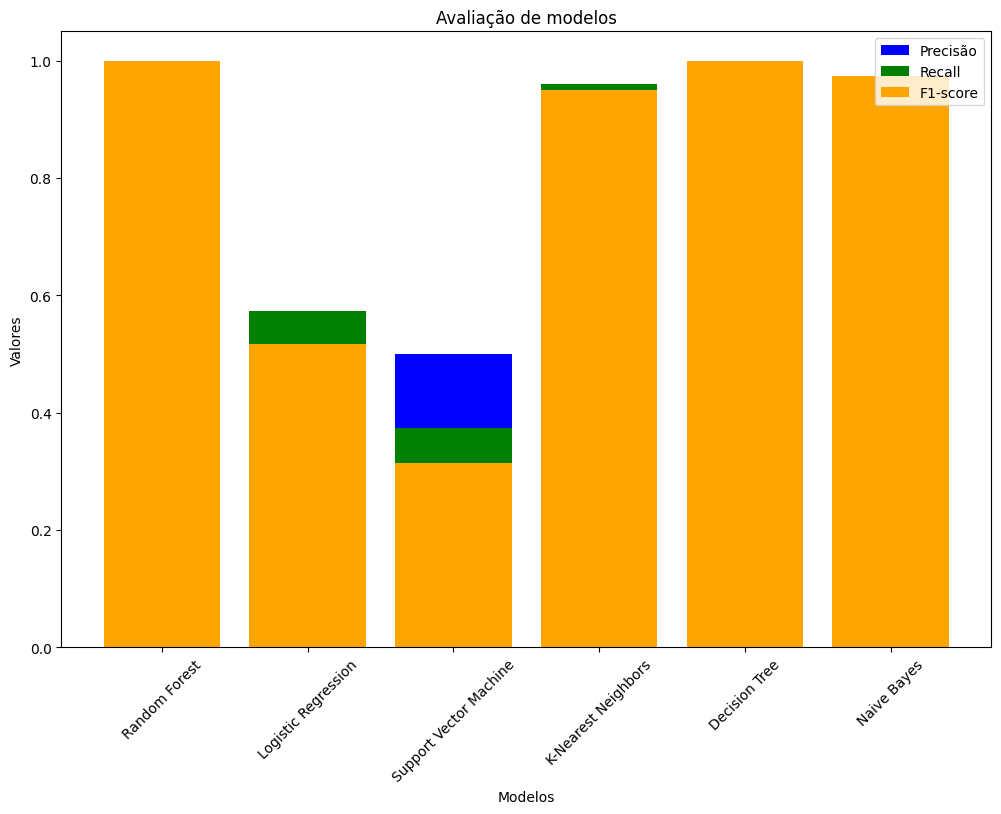

In [67]:
X = dados_corrigidos.drop(columns=['Quality of Sleep', 'Person ID'])
y = dados_corrigidos['Quality of Sleep']

# Criar um Imputador e preencher os valores vazios com a média
imputador = SimpleImputer(strategy='mean')
X_imputed = imputador.fit_transform(X)

# Separar conjunto de treino e teste. Iniciar modelos
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

# Treinar e avaliar os modelos
acuracia = {}
precisao = {}
recall = {}
f1_scores = {}

for name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Prever os resultados
    y_pred = model.predict(X_test)

    # Calcular métricas
    acuracia[name] = accuracy_score(y_test, y_pred)
    precisao[name] = precision_score(y_test, y_pred, average='weighted')
    recall[name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')

# Apresentar os resultados
print("Resultados:")
print("Acurácia:")
for name, score in acuracia.items():
    print(f"{name}: {score:.4f}")
print("\nPrecisão:")
for name, score in precisao.items():
    print(f"{name}: {score:.4f}")
print("\nRecall:")
for name, score in recall.items():
    print(f"{name}: {score:.4f}")
print("\nF1-score:")
for name, score in f1_scores.items():
    print(f"{name}: {score:.4f}")


plt.figure(figsize=(12, 8))
plt.bar(range(len(precisao)), precisao.values(), color='blue', label='Precisão')
plt.bar(range(len(recall)), recall.values(), color='green', label='Recall')
plt.bar(range(len(f1_scores)), f1_scores.values(), color='orange', label='F1-score')

plt.xlabel('Modelos')
plt.ylabel('Valores')
plt.title('Avaliação de modelos')
plt.xticks(range(len(acuracia)), acuracia.keys(), rotation=45)
plt.legend()
plt.show()

Considerando os modelos avaliados anteriormente:
* Random Forest e Decision Tree tiverem uma nota de 1,0 na acurácia, então tivream 100% das previsões corretas;
* Os demais modelos (com exceção do Support Vector Machine e Logistic Regression) tiveram um bom desempenho em relação a acurácia;
* A Precisão teve o mesmo comportamento da acurácia, onde Random Forest e Decision Tree tiverem uma nota de 1,0 e os demais (com exceção do Suport Vector Machine e do Logistic Regression) também tiveram uma alta nota. O que reforça a confiabilidade na previsão dos modelos;
* O mesmo citado anteriormente é válido para a informação de Recall. E considerando este padrão similar para todos, portanto o F1-Score de Random Forest e Decision Tree se destacam. Além disso, Naive Bayes e K-Nearest Neighbors tiveram um desempenho muito positivos.

Porém, uma situação desta é perigosa pois pode estar ocorrendo um overfitting, onde o modelo pode não se generalizar bem para novos dados. Ou seja, ele está extremamente adaptado aos padrões específicos dos dados de treinamento, tendo o risco de não poder aprender padrões novos. Portanto iremos fazer uma validação cruzada para identificar se o modelo está superajustado ou não.

In [68]:
X = dados_corrigidos.drop(columns=['Quality of Sleep', 'Person ID'])  # removendo colunas desnecessárias
y = dados_corrigidos['Quality of Sleep']

# Criar um Imputador e preencher os valores vazios com a média
imputador = SimpleImputer(strategy='mean')
X_imputed = imputador.fit_transform(X)

# Separar conjunto de treino e teste. Iniciar modelos
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}


# Validação cruzada
cv_scores = {}

for name, model in models.items():
    cv_accuracy = cross_val_score(model, X_imputed, y, cv=5, scoring='accuracy').mean()
    cv_precision = cross_val_score(model, X_imputed, y, cv=5, scoring='precision_weighted').mean()
    cv_recall = cross_val_score(model, X_imputed, y, cv=5, scoring='recall_weighted').mean()
    cv_f1 = cross_val_score(model, X_imputed, y, cv=5, scoring='f1_weighted').mean()
    cv_scores[name] = {
        'Acurácia': cv_accuracy,
        'Precisão': cv_precision,
        'Recall': cv_recall,
        'F1-score': cv_f1
    }

print("Resultados da validação cruzada:")
for name, scores in cv_scores.items():
    print(f"Modelo: {name}")
    print(f"Acurácia média: {scores['Acurácia']:.4f}")
    print(f"Precisão média: {scores['Precisão']:.4f}")
    print(f"Recall médio: {scores['Recall']:.4f}")
    print(f"F1-score médio: {scores['F1-score']:.4f}")
    print()

Resultados da validação cruzada:
Modelo: Random Forest
Acurácia média: 0.9197
Precisão média: 0.9208
Recall médio: 0.9197
F1-score médio: 0.9183

Modelo: Logistic Regression
Acurácia média: 0.5080
Precisão média: 0.4219
Recall médio: 0.5080
F1-score médio: 0.4405

Modelo: Support Vector Machine
Acurácia média: 0.3955
Precisão média: 0.2375
Recall médio: 0.3955
F1-score médio: 0.2842

Modelo: K-Nearest Neighbors
Acurácia média: 0.8744
Precisão média: 0.8847
Recall médio: 0.8744
F1-score médio: 0.8671

Modelo: Decision Tree
Acurácia média: 0.8744
Precisão média: 0.8701
Recall médio: 0.8744
F1-score médio: 0.8139

Modelo: Naive Bayes
Acurácia média: 0.8903
Precisão média: 0.8997
Recall médio: 0.8903
F1-score médio: 0.8863



* O Random Forest teve um desempenho geral muito bom, com alta acurácia, precisão, recall e F1-score. Isso indica que o modelo é capaz de fazer previsões precisas e confiáveis para a qualidade do sono.
* A Logistic Regression teve um desempenho muito pobre em comparação com outros modelos.
* A SVM teve um desempenho ainda pior que a Logistic Regression, com uma acurácia muito baixa.
* O KNN obteve um desempenho muito bom, com alta acurácia e F1-score. Isso sugere que a vizinhança dos exemplos de treinamento é uma boa medida para prever a qualidade do sono.
* A Decision Tree teve um desempenho bastante sólido. No entanto, seu recall e F1-score são um pouco menores.
* O Naive Bayes teve um desempenho muito bom, com todas as métricas bastante altas. Isso sugere que o modelo de Naive Bayes é uma boa escolha para este problema de classificação.


* O Random Forest, K-Nearest Neighbors e Naive Bayes são os modelos que se destacam com o melhor desempenho em todas as métricas.
* A Logistic Regression e a SVM tiveram um desempenho significativamente pior, indicando que esses modelos podem não ser adequados para este conjunto de dados ou podem precisar de ajustes.
* O Random Forest e o Naive Bayes são modelos mais robustos e geralmente não sofrem tanto com o overfitting quanto alguns outros modelos, como Decision Tree e SVM.
* Essa análise sugere que o Random Forest, K-Nearest Neighbors e Naive Bayes podem ser as melhores opções para prever a qualidade do sono neste conjunto de dados.

Para ter uma melhor visão do desempenho dos modelos, vamos apresentá-los em outra forma gráfica. Portanto vamos apresentar um gráfico de barras empilhadas para distinguir o desempenho de cada modelo.
Porém, além desta nova visão gráfica, iremos incorporar alguns hiperparâmetros, de forma que o modelo seja otimizado ao máximo. Portanto esta análise gráfica já irá incoporar os hiperparâmetros.

Otimizando Random Forest...
Melhores parâmetros para Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Otimizando K-Nearest Neighbors...
Melhores parâmetros para K-Nearest Neighbors: {'n_neighbors': 3, 'weights': 'distance'}
O modelo Naive Bayes não requer otimização.


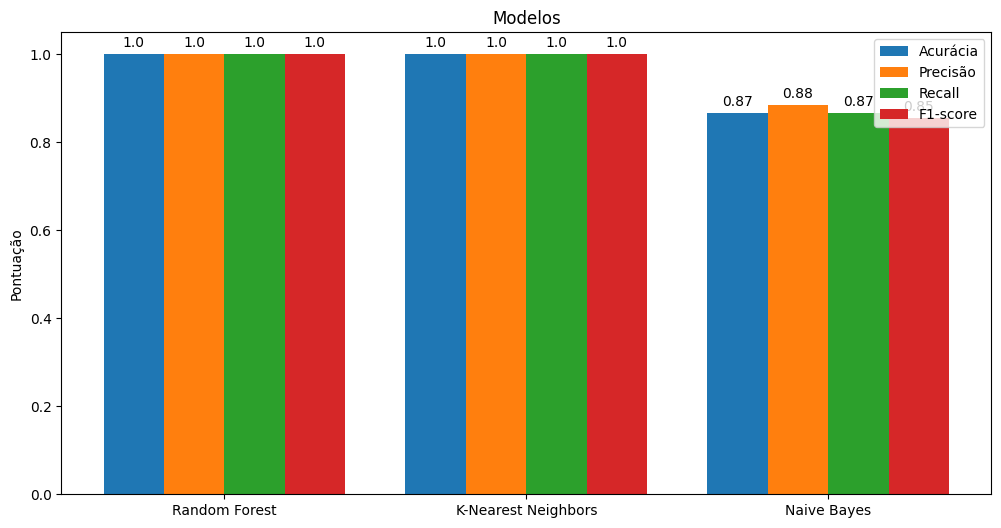

In [72]:
X = dados_corrigidos.drop(columns=['Quality of Sleep', 'Person ID'])
y = dados_corrigidos['Quality of Sleep']


numeric_imputer = SimpleImputer(strategy='mean')
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Treino e teste e treinar os modelos
X_train, X_test, y_train, y_test = train_test_split(X_numeric_imputed, y, test_size=0.2, random_state=42)
models = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Definir os hiperparâmetros
param_grid = {
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

best_models = {}

# Otimizar os modelos
for name, model in models.items():
    if name in param_grid:
        print(f"Otimizando {name}...")
        grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Melhores parâmetros para {name}: {grid_search.best_params_}")
    else:
        print(f"O modelo {name} não requer otimização.")
        best_models[name] = model

# Dicionários para armazenar métricas
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Avaliar os modelos otimizados
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calcular métricas
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')

# Organizar os dados para o gráfico
metrica = list(accuracy_scores.keys())
acuracia_valor = [accuracy_scores[model] for model in models.keys()]
precisao_valor = [precision_scores[model] for model in models.keys()]
recall_valor = [recall_scores[model] for model in models.keys()]
f1_valor = [f1_scores[model] for model in models.keys()]

# Configurar o gráfico
ind = np.arange(len(models))  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plotar as barras para cada métrica
rects1 = ax.bar(ind - 3*width/2, acuracia_valor, width, label='Acurácia')
rects2 = ax.bar(ind - width/2, precisao_valor, width, label='Precisão')
rects3 = ax.bar(ind + width/2, recall_valor, width, label='Recall')
rects4 = ax.bar(ind + 3*width/2, f1_valor, width, label='F1-score')

# Adicionar rótulos, título e legenda
ax.set_xticks(ind)
ax.set_xticklabels(models.keys())
ax.set_ylabel('Pontuação')
ax.set_title('Modelos')
ax.legend()

# Adicionar anotações sobre as barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()


Conseguimos ver o bom desempenho de todos os principais modelos. Mas considerando que o modelo de RF e o modelo de KNK tivram o mesmo desempenho, iremos considerar o resultado proveniente da última análise: a validação cruzada vista anteriormente.
Portanto o modelo que mais se destaca até então é o "Random Forest" logo seguido do "KNN".
Para ter certeza desta nossa escolha, faremos uma matriz de confusão para conseguirmos entender melhor as informações previstas em relação as informações reais.

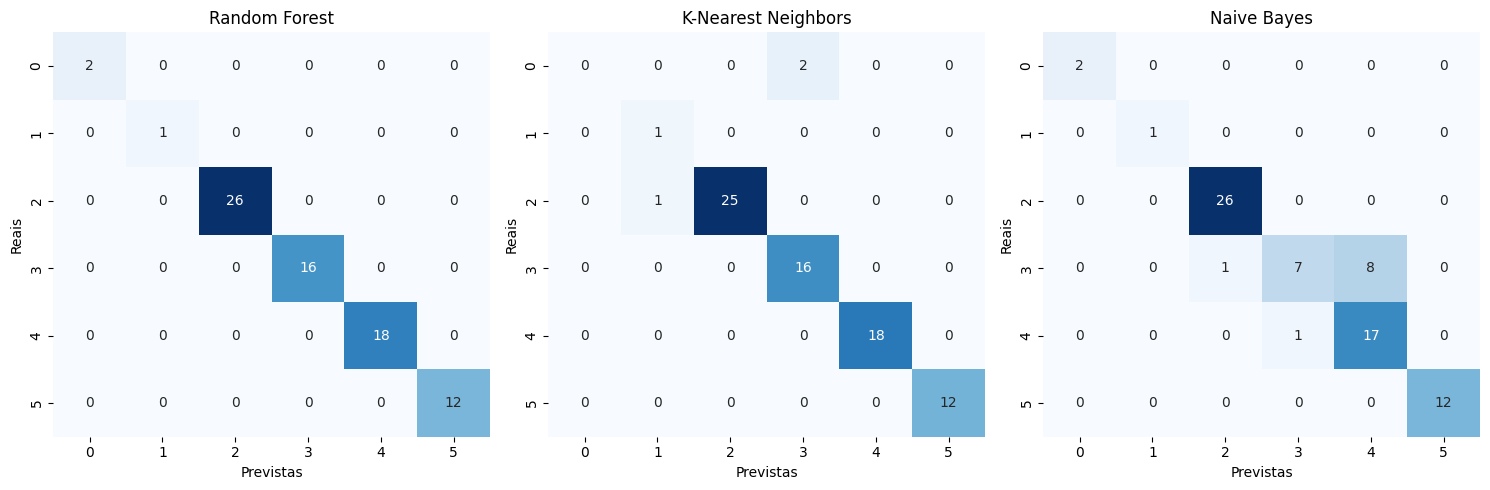

In [73]:
X = dados_corrigidos.drop(columns=['Quality of Sleep', 'Person ID'])
y = dados_corrigidos['Quality of Sleep']

# Criar um Imputador e preencher os valores vazios com a média
imputador = SimpleImputer(strategy='mean')
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_numeric_imputed = pd.DataFrame(numeric_imputer.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Dividir os dados em treino e  teste e iniciar modelos
X_train, X_test, y_train, y_test = train_test_split(X_numeric_imputed, y, test_size=0.2, random_state=42)
models = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


#Armasenar a matriz
MatrizC = {}

# Gerar as matrizes de confusão
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MatrizC[name] = confusion_matrix(y_test, y_pred)
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5))

for i, (name, matrix) in enumerate(MatrizC.items()):
    ax = axes[i]
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Previstas')
    ax.set_ylabel('Reais')
    ax.set_xticklabels([str(i) for i in range(len(matrix))])
    ax.set_yticklabels([str(i) for i in range(len(matrix))])

plt.tight_layout()
plt.show()

Como podemos observar o comportamento de cada um dos principais modelos selecionados, a matriz de confusão nos informa que o Random Forest não teve nenhum erro entre o previsto e o verdadeiro, enquanto o Naive Bayes teve um número mais elevado e o KNN foi bem assertivo também, com poucos erros.

Agora que compreendemos que o método de Random Forest e o KNN são os mais aptos, vamos fazer uma análise rápida de quais são os princiapis Features para cada modelo. De forma a ter uma visibiliade de quais são as top caracaterísticas que influênciam o resultado e, dessa forma, conseguir futuramente até definir pesos e relevâncias para cada parâmetro.

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Ajustar RF
best_model_rf = RandomForestClassifier()
best_model_rf.fit(X_train, y_train)

# Calculando a feature importance
feature_importance_rf = best_model_rf.feature_importances_

# Ajustar KNN
best_model_knn = KNeighborsClassifier()
best_model_knn.fit(X_train_scaled, y_train)

# Calculando a feature importance
feature_importance_knn = X_train_scaled.std(axis=0)

# Criando DataFrame para armazenar a importância das características
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Random Forest': feature_importance_rf,
    'K-Nearest Neighbors': feature_importance_knn
})

# Classificar as características por importância
feature_importance_df_rf = feature_importance_df.sort_values(by='Random Forest', ascending=False)
feature_importance_df_knn = feature_importance_df.sort_values(by='K-Nearest Neighbors', ascending=False)

# Exibir as 10 principais características
print("Top 10 características - Random Forest:")
print(feature_importance_df_rf.head(10))
print("\nTop 10 características- K-Nearest Neighbors:")
print(feature_importance_df_knn.head(10))

Top 10 características - Random Forest:
                   Feature  Random Forest  K-Nearest Neighbors
4             Stress Level       0.293212             0.353118
2           Sleep Duration       0.256567             0.291595
1                      Age       0.177066             0.276430
6               Heart Rate       0.072458             0.192339
3  Physical Activity Level       0.068479             0.346392
7              Daily Steps       0.058819             0.228278
5             BMI Category       0.050751             0.267726
0                   Gender       0.014899             0.499527
8           Sleep Disorder       0.007750             0.492082

Top 10 características- K-Nearest Neighbors:
                   Feature  Random Forest  K-Nearest Neighbors
0                   Gender       0.014899             0.499527
8           Sleep Disorder       0.007750             0.492082
4             Stress Level       0.293212             0.353118
3  Physical Activity Level      

Os resultados se apresentam bem curiosos em cada um dos modelos, ao verificar a imortância de cada característica.

Para o modelo Random Forest, os Top#5 fatores que influênciam a qualidade do sono são, em ordem crescente: Duração do sono, Nível de stress, Idade, Rítimo do coração e Nível de atividade física.

Para o modelo KNN, os Top#5 fatores que influênciam a qualidade do sono são, em ordem crescente: Genero, Disturbio do sono, Nível de Stress, Nível de atividades físicas e Duração do sono.

Enquanto no modelo de RF tem uma informação a qual não concordo: a característica de "Sleep Disorder" tem a menor influencia, no modelo KNN esta característica assume um papel importante. Porém o modelo KNN trás uma grande importância do genero para a previsão do modelo, que creio não deveria ser um fator tão influente assim.

Considerando que ambos modelos se saíram tão bem em todas as avaliações, mas consideram características tão diferentes como principais para a criação do modelo, decidimos então criar um novo modelo, porém desta vez com o sistema de voting. Irenmos treinar ambos modelos individualmente e depois criaremos um modelo que combinará as previsões usando a estratégia de "hard voting".

In [76]:
X = dados_corrigidos.drop(columns=['Quality of Sleep', 'Person ID'])
y = dados_corrigidos['Quality of Sleep']

# Criar um Imputador e normalizar os dados
imputador = SimpleImputer(strategy='mean')
X_imputed = imputador.fit_transform(X)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Separar conjunto de treino e teste e iniciar modelos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Prever os resultados
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Avaliar a acurácia de cada modelo
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_knn = accuracy_score(y_test, y_pred_knn)

print("Acurácia RF:", acc_rf)
print("Acurácia KNN:", acc_knn)

# Criar o modelo de votação
voting_model = VotingClassifier(estimators=[('RF', rf_model), ('KNN', knn_model)], voting='hard')
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

# Avaliar a acurácia do modelo de votação
acc_voting = accuracy_score(y_test, y_pred_voting)
print("Acurácia do modelo de votação:", acc_voting)

Acurácia RF: 1.0
Acurácia KNN: 0.96
Acurácia do modelo de votação: 1.0


Caímos mais uma vez em um overfitting, provavelmente o modelo está memorizando os resultados ao invés de aprender e isto pode ser perigoso para dados novos além destes que estão agora no database. Precisamos de um modelo que consiga olhar de uma forma mais generalista, portanto iremos adicionar mais um modelo (que utilize regressão linear, uma abordagem diferente) para a votação.
O modelo adicional escolhido foi o "Gradient Boosting", ele foi utilizado juntamente a validação cruzada e o ajuste de hiperparametros.

In [77]:
# Tratar valores, normalizar dados
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Dividir em treino, teste e inicializar modelos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
gb_model = GradientBoostingClassifier(random_state=42)

# Definir os hiperparâmetros para o Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Encontrar os melhores hiperparâmetros para o Gradient Boosting
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

# Aplicar a validaçaõ cruzada
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
gb_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5)

# Calcular a média
rf_mean_score = rf_scores.mean()
knn_mean_score = knn_scores.mean()
gb_mean_score = gb_scores.mean()

print("Acurácia média RF:", rf_mean_score)
print("Acurácia média KNN:", knn_mean_score)
print("Acurácia média GB:", gb_mean_score)

# Criar o modelo de voting
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('knn', knn_model),
    ('gb', best_gb_model)
], voting='hard', weights=[1, 1, 2])

voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)

# Avaliar a acurácia do modelo de voting
acc_voting = accuracy_score(y_test, y_pred_voting)
print("Acurácia da votaçãõ:", acc_voting)

Acurácia média RF: 0.9598870056497175
Acurácia média KNN: 0.8963276836158192
Acurácia média GB: 0.9732203389830507
Acurácia da votaçãõ: 1.0


Ainda assim encontramos um overfitting, portanto iremos selecionar as características com maior importância por avaliação qualitativa e colocaremos um peso um pouco maiorpara cada modelo.

In [80]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tratar valores e normalizar os dados
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Iniciar os modelos
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Aplicar a validação cruzada
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
knn_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
gb_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5)

# Calcular a média dos pontos
rf_mean_score = rf_scores.mean()
knn_mean_score = knn_scores.mean()
gb_mean_score = gb_scores.mean()

print("Acurácia média RF:", rf_mean_score)
print("Acurácia média KNN:", knn_mean_score)
print("Acurácia média GB:", gb_mean_score)

# Definir o peso de cada modelo
weights = {
    'rf': 0.6,
    'knn': 0.3,
    'gb': 0.6
}

# Criar o modelo de voting
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('knn', knn_model),
    ('gb', gb_model)
], voting='soft', weights=weights.values())
voting_model.fit(X_train_scaled, y_train)
y_pred_voting = voting_model.predict(X_test_scaled)

# Avaliar o model ode voting
acc_voting = accuracy_score(y_test, y_pred_voting)
print("Acurácia do modelo de votação:", acc_voting)

Acurácia média RF: 0.9532203389830508
Acurácia média KNN: 0.8997175141242938
Acurácia média GB: 0.9665536723163841
Acurácia do modelo de votação: 0.9733333333333334


Agora conseguimos um modelo, através da votação ponderada, que não tem a acurácia de 100%. Por mais que seja uam alta acurácia, já reduz o risco de overfitting.

Por fim, vamos apresentar alguns resultados de exemplo para comparar o valor real e o valor previsto pelo modelo, essa seleção de quais serão os exemplos será aleatória. Traremos abaixo 20 situações:

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tratar valores e normalizar os dados
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Iniciar modelos
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)

# Validação cruzada
rf_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
knn_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
gb_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5)

# Pontuaççoes
rf_mean_score = rf_scores.mean()
knn_mean_score = knn_scores.mean()
gb_mean_score = gb_scores.mean()

print("Acurácia RF:", rf_mean_score)
print("Acurácia KNN:", knn_mean_score)
print("Acurácia GB:", gb_mean_score)

# Definir o peso de cada modelo
weights = {
    'rf': 0.6,
    'knn': 0.3,
    'gb': 0.6
}

# Criar votação ponderada
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('knn', knn_model),
    ('gb', gb_model)
], voting='soft', weights=weights.values())
voting_model.fit(X_train_scaled, y_train)
y_pred_voting = voting_model.predict(X_test_scaled)
acc_voting = accuracy_score(y_test, y_pred_voting)
print("Acurácia do modelo de votação ponderada:", acc_voting)

# Selecionar 20 amostras aleatórias
random_samples = random.sample(range(len(X_test)), 20)

# Fazer previsões com o modelo
y_pred_voting = voting_model.predict(X_test_scaled)

# Calcular o % de assertividade para cada linha
percentages_voting = []
for idx in random_samples:
    if y_test.iloc[idx] == y_pred_voting[idx]:
        percentages_voting.append(100)
    else:
        percentages_voting.append(0)

# Criar a tabela com os valores previstos, valores reais e % de assertividade
table_data_voting = {
    'Previsto': y_pred_voting[random_samples],
    'Real': y_test.iloc[random_samples],
    'Acurácia (%)': percentages_voting
}

# Criar DataFrame
table_df_voting = pd.DataFrame(table_data_voting)
print("\nTabela com 20 amostras do modelo de votação ponderada:")
print(table_df_voting)

Acurácia RF: 0.9532203389830508
Acurácia KNN: 0.8997175141242938
Acurácia GB: 0.9665536723163841
Acurácia do modelo de votação ponderada: 0.9733333333333334

Tabela com 20 amostras do modelo de votação ponderada:
     Previsto  Real  Acurácia (%)
126         8     8           100
78          6     6           100
255         7     7           100
132         8     8           100
93          8     7             0
327         9     9           100
176         8     8           100
76          6     6           100
145         8     7             0
288         6     6           100
346         9     9           100
25          7     7           100
90          8     8           100
73          6     6           100
153         8     8           100
311         7     7           100
94          8     8           100
239         6     6           100
237         7     7           100
57          6     6           100


## **04. Exportar o melhor modelo para deploy**

In [82]:
import pickle
import requests

# Treinar o modelo de voting
voting_model.fit(X_train_scaled, y_train)

# Salvar o modelo treinado com pickle
with open('modelo_voting.pkl', 'wb') as f:
    pickle.dump(voting_model.estimators_, f)

# Upload do modelo para o GitHub
upload_url = 'https://raw.githubusercontent.com/KevinSathler/Machine-Learning-Analytics/main/modelo_voting.pkl'

with open('modelo_voting.pkl', 'rb') as f:
    response = requests.put(upload_url, data=f.read())

if response.status_code == 200:
    print("Modelo treinado salvo e enviado com sucesso para o GitHub.")
else:
    print("Ocorreu um erro ao enviar o modelo treinado para o GitHub.")

SSLError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /KevinSathler/Machine-Learning-Analytics/main/modelo_voting.pkl (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:2426)')))

## **5. Conclusão**

Através deste MVP foi possível colocar em prática os conhecimentos adiquiridos durante o decorrer das aulas e dos estudos. Ao escrever os códigos e estudar/pesquisar mais a fundo a matéria para conseguir entender os próximos passos do racicínio lógico, pude enfim clarificar a matéria. Quando estava apenas estudando me parecia algo muito distante e complexo, porém ao montar esse MVP consegui entender perfeitamente o que fora apresentado nas aulas.

Vale ressaltar que todo meu racicínio durante o desenrolar do problema foi registrado. Portanto segui uma estrutura seguindo a cronologia mental para desenvolver o MVP e, durante a consolidação do material fui entendendo o dataset e corrigindo-o conforme achava necessário. Além disso, por algumas vezes me deparei com problemas de código e, principalmente, de overfitting (foi a maior dificuldade que encontrei). Devido a este overfitting precisei entender mais a fundo o que poderia fazer para reduzir um pouco a acurácia do meu modelo.

Para superar as diversas dificuldades (seja técnica e seja de conceitos), utilizei de ferramentas de pesquisas e sites de suporte (como o stackoverflow). E por vezes tive dificuldades em entender algumas coisas as quais pesquisava, ou até mesmo dúvidas sobre a matéria em si e portanto em alguns moemntos precisei recorrer ao auxílio de inteligências artificiais para me trazer uma explicação de códigos encontrados ou até mesmo em como colocar em prática alguns aprendizados.

Portanto além de ter aprendido sobre questões teóricas, conceituais e práticas, mais importante que isto: Aprendei como aprender, como investigar, como pesquisar e como entender algo que antes estava sendo uma grande dificuldade.
